# Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Data Collection

In [2]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df1=df.drop('Id',axis=1)

In [8]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
#checking missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#Converting labels into numerical value
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
le.fit(df1.Species)
df1['categorical_label'] = le.transform(df1.Species)
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,categorical_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [11]:
df2=df1.drop("Species",axis=1)
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,categorical_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Data Visualization

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64


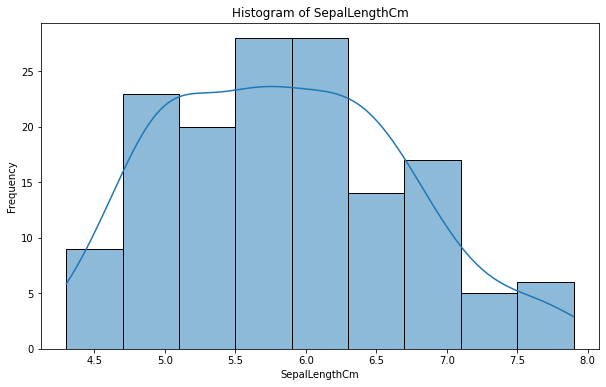

In [12]:
# Select the numerical column to analyze
numerical_column = "SepalLengthCm"  

# Descriptive statistics
print(df1[numerical_column].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=numerical_column, kde=True)
plt.title("Histogram of " + numerical_column)
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.show()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64


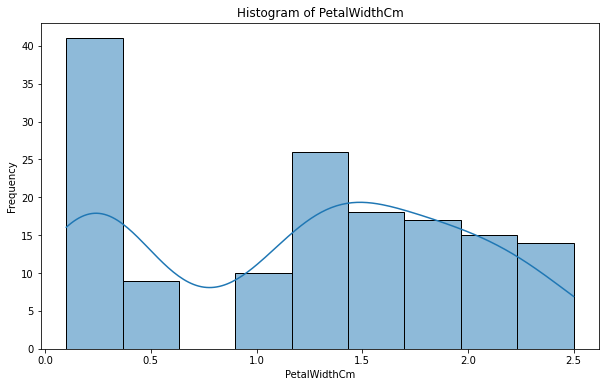

In [13]:
# Select the numerical column to analyze
numerical_column = "PetalWidthCm"  

# Descriptive statistics
print(df1[numerical_column].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=numerical_column, kde=True)
plt.title("Histogram of " + numerical_column)
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.show()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64


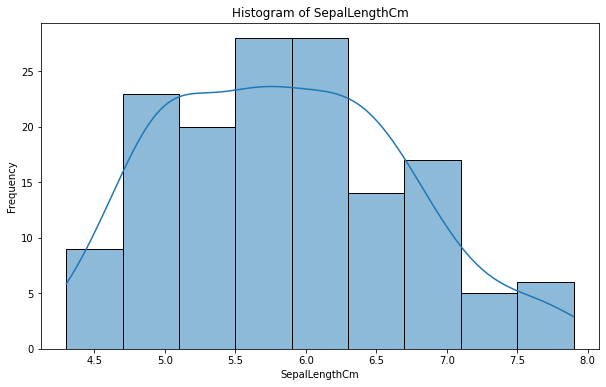

In [14]:
# Select the numerical column to analyze
numerical_column = "SepalLengthCm"  

# Descriptive statistics
print(df1[numerical_column].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=numerical_column, kde=True)
plt.title("Histogram of " + numerical_column)
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.show()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64


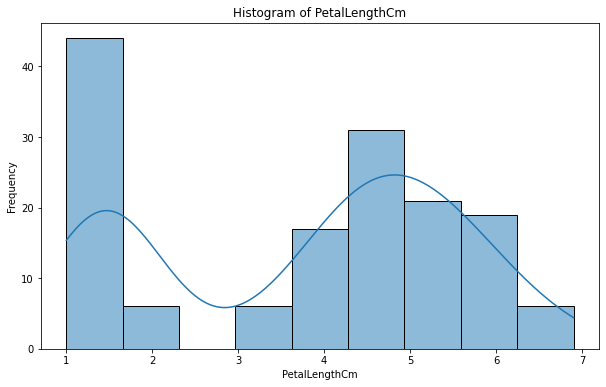

In [15]:
# Select the numerical column to analyze
numerical_column = "PetalLengthCm"  

# Descriptive statistics
print(df1[numerical_column].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=numerical_column, kde=True)
plt.title("Histogram of " + numerical_column)
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.show()

# Splitting the features and labels 

In [17]:
x=df2.drop('categorical_label',axis=1)
y=df2['categorical_label']

In [18]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: categorical_label, Length: 150, dtype: int32

# Splitting the data into training and testing dataset

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
x.shape

(150, 4)

In [24]:
x_train.shape

(120, 4)

In [22]:
x_test.shape

(30, 4)

In [25]:
y.shape

(150,)

In [27]:
y_train.shape

(120,)

In [28]:
y_test.shape

(30,)

# Model Training

In [29]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

In [30]:
#evaluating training data
x_training_data=lr.predict(x_train)
training_accuracy_data=metrics.accuracy_score(y_train,x_training_data)
print("Accuracy score of training dataset:",training_accuracy_data)

Accuracy score of training dataset: 0.975


In [31]:
#evaluating testing data
x_testing_data=lr.predict(x_test)
testing_accuracy_data=metrics.accuracy_score(y_test,x_testing_data)
print("Accuracy score of training dataset:",testing_accuracy_data)

Accuracy score of training dataset: 0.9666666666666667


# Model Making

Building a Predictive System

In [35]:
input_data=(5.1,3.5,1.4,0.2)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=lr.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
    print("The predicted species is Iris-setosa")
if (prediction[0]==1):
    print("The predicted species is Iris-versicolor")
if (prediction[0]==2):
      print("The predicted species is Iris-virginica")

[0]
The predicted species is Iris-setosa


C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
input_data=(6.2,3.4,5.4,2.3)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=lr.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
    print("The predicted species is Iris-setosa")
if (prediction[0]==1):
    print("The predicted species is Iris-versicolor")
if (prediction[0]==2):
      print("The predicted species is Iris-virginica")

[2]
The predicted species is Iris-virginica


C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
